# Exploratory Data Analysis of House Prices

- Veri seti [kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)'dan alinmistir.

## ***Data Cleaning***

- Once veri temizligi

### Veri tipleri

- Veri tiplerini listele

In [41]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
warnings.filterwarnings('ignore')

# pandas varsayilan olarak cok sayida sutun veya satir varsa tumunu gostermez
# bu nedenle 100 sutun ve satir gostermesi icin
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

pd.options.display.float_format
# veri setini dataframe icerisine yukle
df = pd.read_csv('train.csv')


print('\nHer bir degiskenin tipi:')
print('=======================================')
df.info()


Her bir degiskenin tipi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-nu

- Surekli ve Kategorik degiskenleri belirle.

In [10]:
# if column data type is not object add it to the quantitative list
quantitative = [column for column in df.columns if df.dtypes[column] != 'object']

print('\nSurekli degiskenler : \n', quantitative)

# if column data type is object add it to the quantitative list
qualitative = [column for column in df.columns if df.dtypes[column] != 'object']

print('\nKategorik degiskenler : \n', quantitative)


Surekli degiskenler : 
 ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

Kategorik degiskenler : 
 ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'Enclosed

### Null deger orani

In [22]:
print('\nHer bir degiskenin null deger oranlari  (%):')
print('=======================================')

# null degerleri isnull() metodu ile True/False olarak listeleyebilirim
# deger null oldugunda True doneceginden, isnull() metodundan donen nesneye 
# mean() metodunu uyguladigimizda null degerlerin ortlamasini verecektir.
df.isnull().mean()*100


Her bir degiskenin null deger oranlari  (%):


Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

- Eksik degerlerin doldurmak icin uygun oldugu (eksik deger orani sifirdan buyuk %50 den kucuk) ve olmadigi (yaridan fazla eksik deger bulunan) degiskenler

In [81]:
# if column null value mean is higher than %50 it is not suitable for filling
not_fit_to_fill = [column for column in df.columns if df[column].isnull().mean() > 0.5]

# if column null value mean is lower than %50 it is suitable for filling
fit_to_fill = [column for column in df.columns if (df[column].isnull().mean() < 0.5 and df[column].isnull().mean() != 0)]

print('\nEksik degeri olan ve orani % 50 den az olan  degiskenler \n ', fit_to_fill)
print('\nEksik deger orani % 50 den fazla olan degiskenler \n ', not_fit_to_fill)



Eksik degeri olan ve orani % 50 den az olan  degiskenler 
  ['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']

Eksik deger orani % 50 den fazla olan degiskenler 
  ['Alley', 'PoolQC', 'Fence', 'MiscFeature']


- Eksik degerlerin sutun ve satirlar bazinda gorsellestirilmesinde 4 sutunun bos oldugu goruluyor.

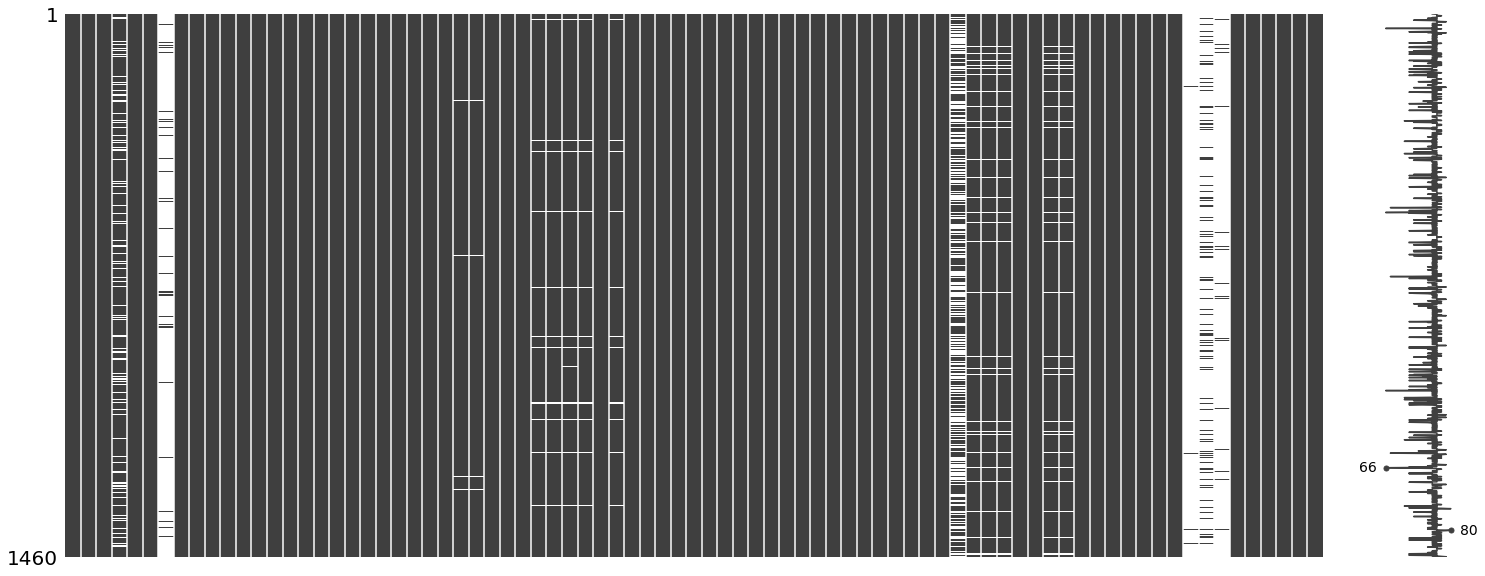

In [71]:
missingno.matrix(df)
plt.show()

- Eksik degerlerin bar grafigi

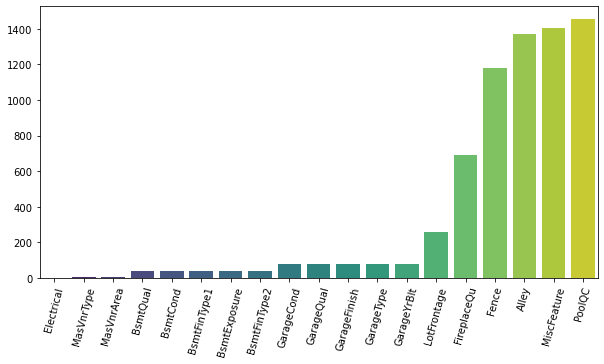

In [111]:
# create a series that has sum of null values
missing = df.isnull().sum()

# return only the selected rows that > 0
missing = missing.where(lambda x : x>0).dropna()
# same operation like above in different way  
# missing = missing[missing > 0]

# sort by values
missing.sort_values(inplace=True)

# plt the missing values graph
plt.figure(figsize=(10,5))
sns.barplot(x=missing.index, y=missing.values, palette="viridis")
plt.xticks(rotation=75)
plt.show()